In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset/spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
dataset.shape

(5572, 5)

In [4]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
drop_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
dataset.drop(columns=drop_columns, inplace=True)

In [6]:
dataset.rename(columns={'v1':'label', 'v2': 'text'}, inplace=True)

In [7]:
dataset['label'] = dataset['label'].apply(lambda x: 0 if x == 'ham' else 1)
dataset.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dataset.duplicated().sum()

403

In [9]:
dataset = dataset.drop_duplicates(keep='first')
dataset.shape

(5169, 2)

### EDA

In [10]:
dataset['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

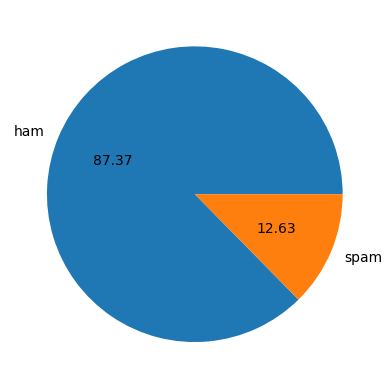

In [11]:
import matplotlib.pyplot as plt

plt.pie(dataset['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

* Data imbalance

In [12]:
import nltk

# nltk.download('punkt_tab')

In [13]:
dataset['num_characters'] = dataset['text'].apply(len)

In [14]:
dataset.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
dataset['num_words'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
dataset.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
dataset.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
dataset[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# ham 
dataset[dataset['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# spam 
dataset[dataset['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

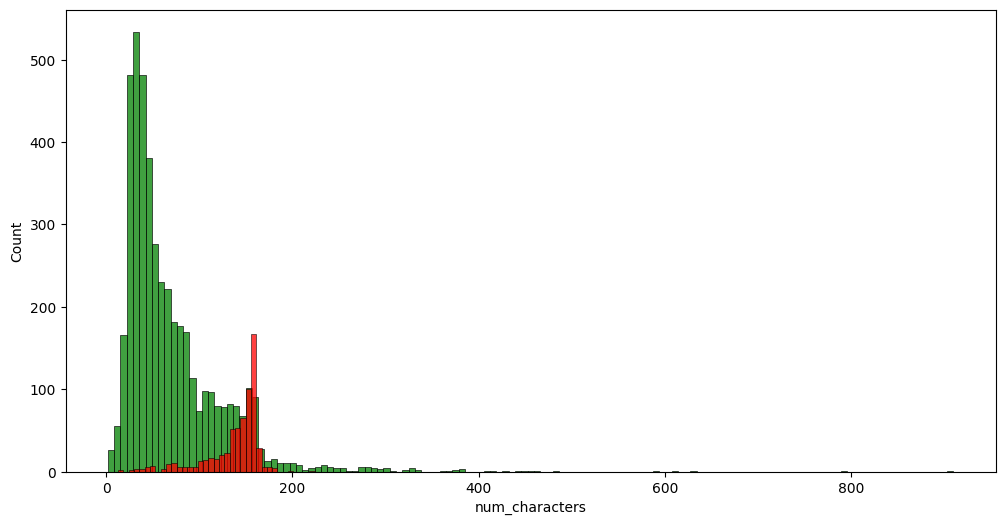

In [22]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['label'] == 0]['num_characters'], color='green')
sns.histplot(dataset[dataset['label'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

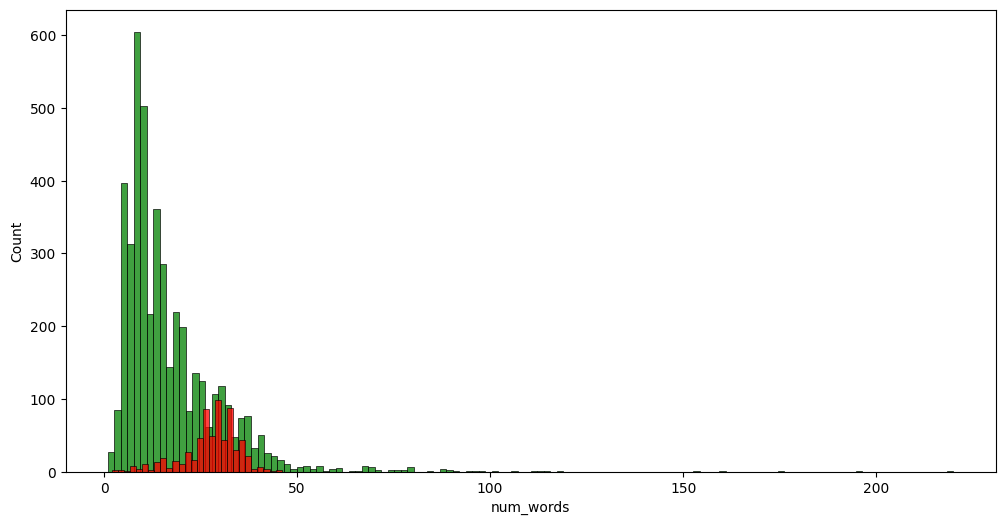

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['label'] == 0]['num_words'], color='green')
sns.histplot(dataset[dataset['label'] == 1]['num_words'], color='red')

<Axes: >

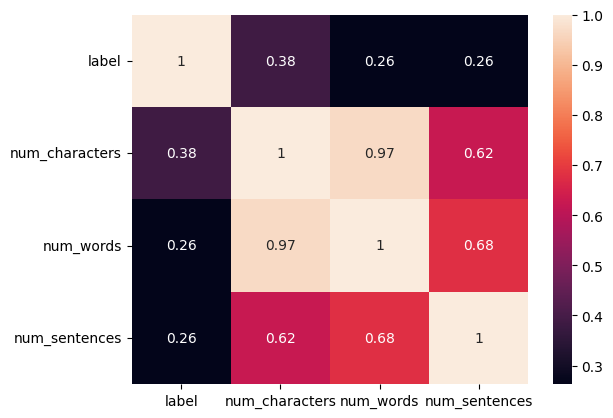

In [24]:
numeric_dataset = dataset.select_dtypes(include='number')

sns.heatmap(numeric_dataset.corr(), annot=True)

### Data Preprocessing

* lower case
* Tokenization
* Removing special chars
* removing stop words and punctuation
* stemming

In [25]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [28]:
transform_text("Hi Buddy how are you?")

'hi buddi'

In [29]:
dataset['transformed_text'] = dataset['text'].apply(transform_text)
dataset.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [32]:
spam_wc = wc.generate(dataset[dataset['label'] == 1]['transformed_text'].str.cat(sep=" "))

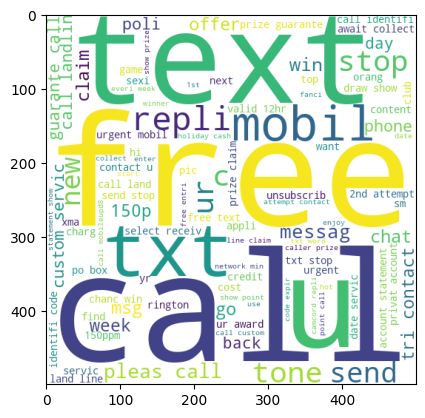

In [33]:
plt.imshow(spam_wc)

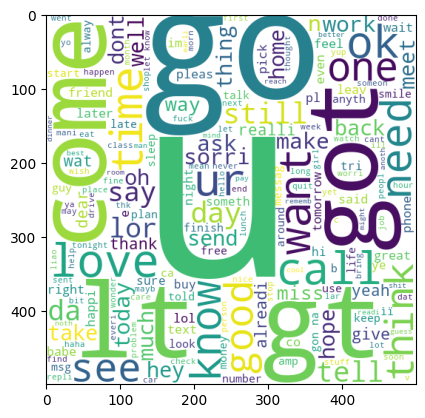

In [34]:
ham_wc = wc.generate(dataset[dataset['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [35]:
dataset.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
spam_corpus = []
for msg in dataset[dataset['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

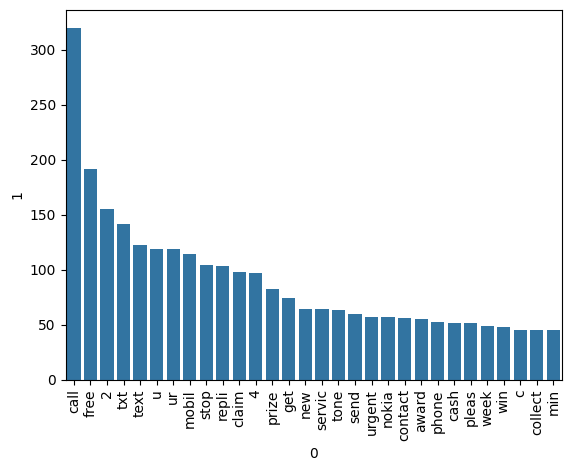

In [37]:
from collections import Counter

spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_corpus_df[0], y=spam_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
ham_corpus = []
for msg in dataset[dataset['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

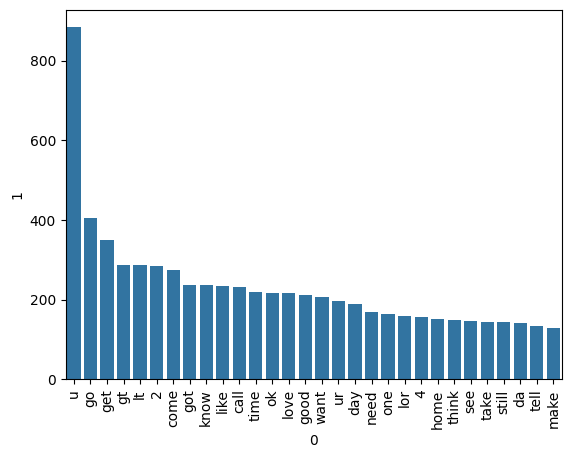

In [39]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_corpus_df[0], y=ham_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
dataset.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model Building

In [41]:
from gensim.models import Word2Vec

def split(text):
    return text.split()

dataset['tokens'] = dataset['transformed_text'].apply(split)
w2v_model = Word2Vec(sentences=dataset['tokens'], window=10, min_count=1)

In [42]:
def get_sentense_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

dataset['vector'] = dataset['tokens'].apply(lambda x: get_sentense_vector(x, w2v_model))

In [43]:
X = np.stack(dataset['vector'].values)
y = dataset['label'].values


In [44]:
print(X.shape)
print(y.shape)

(5169, 100)
(5169,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [47]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision: ", precision_score(y_test, y_pred1))


Accuracy:  0.48452611218568664
Confusion Matrix:
 [[373 516]
 [ 17 128]]
Precision:  0.19875776397515527


In [49]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision: ", precision_score(y_test, y_pred3))


Accuracy:  0.8578336557059961
Confusion Matrix:
 [[887   2]
 [145   0]]
Precision:  0.0


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.758220502901354, 0.02702702702702703)

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name," -----")
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC  -----
Accuracy -  0.758220502901354
Precision -  0.02702702702702703
For  KN  -----
Accuracy -  0.9439071566731141
Precision -  0.8041958041958042
For  DT  -----
Accuracy -  0.90715667311412
Precision -  0.6666666666666666
For  LR  -----
Accuracy -  0.8945841392649904
Precision -  0.8214285714285714
For  RF  -----
Accuracy -  0.9516441005802708
Precision -  0.9439252336448598
For  GBDT  -----
Accuracy -  0.9361702127659575
Precision -  0.898989898989899
For  xgb  -----
Accuracy -  0.9584139264990329
Precision -  0.9112903225806451


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [61]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.951644,0.943925
6,xgb,0.958414,0.911290
5,GBDT,0.936170,0.898990
3,LR,0.894584,0.821429
1,KN,0.943907,0.804196
2,DT,0.907157,0.666667
0,SVC,0.758221,0.027027


In [62]:
import pickle
w2v_model.save("w2v_model.model")
pickle.dump(clfs['RF'], open('rf_model.pkl', 'wb'))
pickle.dump(clfs['xgb'], open('xgb_model.pkl', 'wb'))

In [63]:
custom_sen = ["Congratulations", "You", "have", "won", "free", "ticket", "Bahamas", "Call", "now"]
custom_vector = get_sentense_vector(custom_sen, w2v_model).reshape(1, -1)

In [64]:
clfs['RF'].predict(custom_vector)[0]

1